In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('AllMLAsy.csv')
dfm30 = df.query('theta == -30.0')
dfm20 = df.query('theta == -20.0')
dfm10 = df.query('theta == -10.0')
df0 = df.query('theta == 0.0')
dfp10 = df.query('theta == 10.0')
dfp20 = df.query('theta == 20.0')
dfp30 = df.query('theta == 30.0')

count_list = [len(dfm30), len(dfm20), len(dfm10), len(df0), len(dfp10), len(dfp20), len(dfp30)]
#count_list = [len(dfm10), len(df0), len(dfp10)]
count_min = min(count_list)

datam30 = dfm30.sample(n=count_min)
datam20 = dfm20.sample(n=count_min)
datam10 = dfm10.sample(n=count_min)
data0 = df0.sample(n=count_min)
datap10 = dfp10.sample(n=count_min)
datap20 = dfp20.sample(n=count_min)
datap30 = dfp30.sample(n=count_min)

data = pd.concat([datam30,datam20,datam10,data0,datap10,datap20,datap30])
#data = pd.concat([datam10,data0,datap10])
data['Ch2'] = data['Ch2']-780
data['Ch3'] = data['Ch3']-782
data['Ch4'] = data['Ch4']-777
data['Ch5'] = data['Ch5']-782
data['Ch6'] = data['Ch6']-776
data['Ch7'] = data['Ch7']-787
data.describe()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,r,theta,sum,Asy
count,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.0,61495.000000,61495.000000,61495.000000
mean,811.726807,220.293536,108.951102,44.513440,38.736027,44.952045,112.391658,15.0,0.000000,5253.837808,-0.036785
std,6.964707,25.264573,15.369345,7.781531,7.165870,7.808677,15.230237,0.0,20.000163,26.640454,0.105766
min,790.000000,117.000000,53.000000,16.000000,12.000000,-1.000000,-1.000000,15.0,-30.000000,5201.000000,-0.437500
25%,808.000000,203.000000,98.000000,40.000000,34.000000,40.000000,102.000000,15.0,-20.000000,5233.000000,-0.108333
50%,811.000000,220.000000,107.000000,44.000000,38.000000,45.000000,112.000000,15.0,0.000000,5256.000000,-0.042253
75%,815.000000,238.000000,117.000000,49.000000,43.000000,49.000000,122.000000,15.0,20.000000,5276.000000,0.027778
max,989.000000,415.000000,189.000000,153.000000,147.000000,156.000000,190.000000,15.0,30.000000,5299.000000,0.911765


In [23]:

#data = data.assign(phi23 = np.arctan(data['mppc2']/data['mppc3']))
data = data.assign(phi37 = np.arctan(data['Ch3']/data['Ch7']))
data = data.assign(Asy37 = (data['Ch3']-data['Ch7'])/(data['Ch7']+data['Ch3']-782-787))
data = data.assign(Asy46 = (data['Ch4']-data['Ch6'])/(data['Ch4']+data['Ch6']-777-776))
data = data.assign(Asy23 = (data['Ch2']-data['Ch3'])/(data['Ch2']+data['Ch3']-782-780))
data = data.assign(Asy27 = (data['Ch2']-data['Ch7'])/(data['Ch7']+data['Ch2']-780-787))
data = data.assign(Ch34 = data['Ch3']+data['Ch4'])
data = data.assign(Ch67 = data['Ch6']+data['Ch7'])
y = data['theta']
#features = ['mppc1', 'mppc2', 'mppc3', 'sum', 'asy12', 'asy23', 'asy31', 'phi23']
features = ['Ch2','Ch3','Ch4','Ch5','Ch6','Ch7','Asy37','Asy46','Asy23','Asy27',]
#features = ['mppc1', 'mppc2', 'mppc3']
x = data[features]
train_x, val_x, train_y, val_y = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(max_depth=10)
#test = model.predict(val_x)
model.fit(train_x,train_y)

preds = model.predict(val_x)
rmse = np.sqrt(mean_squared_error(val_y, preds))
print(rmse)

17.541895966124425


[12.011350277652664, 2.286164423727955, -8.842791202745316, 1.4046101854596886, 8.683359903405707, 10.942967211882163, 3.893847171847966, -1.2363187692896114, 8.219406856113023, 5.0972698965692045, -1.2686093942580512, 21.9705123331061, 19.12909055929829, 12.816234971950543, 1.7050788232755625, 9.235976409476525, 13.289064938753743, 2.90654419107391, 1.7807280602570108, 23.115078952872057, 6.462362522054904, 6.770806992458721, 20.65296885531921, 0.821107461099516, 8.758045614125228, 17.43303011244991, 21.830653671947278, 12.084661928205573, -7.399525097816313, 22.66258557713033, 10.322022542097612, 11.637784267678578, -3.5897927661165987, 12.105415420195033, 11.11804799029061, 19.58624273602739, -1.2860176370498673, 12.585093131881276, -5.545048755228931, -2.517934235739026, 6.410621257246292, -15.955843093916753, -1.076993735943398, -10.220536971168464, 12.819533176738323, -1.8147970149631254, -3.9740019310400805, 15.943870979257378, -3.6475683033308304, 5.436581153255569, 0.484097119

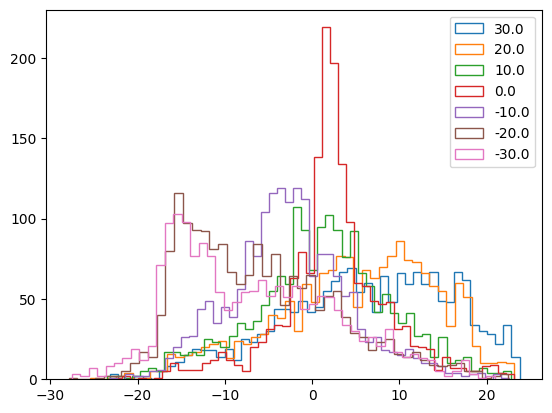

In [22]:
def get_each_rmse(theta, preds, val_y):

    p_y = preds.tolist()
    v_y = val_y.tolist()

    p_y_theta = []
    for i in range(len(v_y)):
        if v_y[i] == theta:
            p_y_theta.append(p_y[i])
    print(p_y_theta)

    theta_array = []
    for i in range(len(p_y_theta)):
        theta_array.append(theta)
    print('theta', theta, 'counts', len(theta_array))

    rmse_theta = np.sqrt(mean_squared_error(p_y_theta, theta_array))
    print(rmse_theta)
    plt.hist(p_y_theta, bins=50, histtype='step', label=theta)

get_each_rmse(30.0, preds, val_y)
get_each_rmse(20.0, preds, val_y)
get_each_rmse(10.0, preds, val_y)    
get_each_rmse(0.0, preds, val_y)
get_each_rmse(-10.0, preds, val_y)
get_each_rmse(-20.0, preds, val_y)
get_each_rmse(-30.0, preds, val_y)
plt.legend()